<a href="https://colab.research.google.com/github/NagillaUdayasree/Udayasree_INFO5731_Spring2024/blob/main/Nagilla_Udayasree_Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Wednesday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


# Question 1 (40 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]

(3) Collect all the reviews of the top 1000 most popular software from G2 or Capterra.

(4) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(5) Collect all the information of the 904 narrators in the Densho Digital Repository.


In [8]:
import requests
from bs4 import BeautifulSoup
import csv

#function to scrape user reviews from IMDb
def get_user_reviews(url):
    # Sending a GET request to the URL and parse the HTML content
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Finding all user review elements and extracting the review text
    user_reviews_list = soup.find_all('div', 'text show-more__control')
    user_reviews = [user_review.text.strip() for user_review in user_reviews_list]

    # Extracting the token for pagination (used for accessing the loadmore feature to access next page)
    ajax_token = None
    ajax_token_list = soup.find_all('div', 'load-more-data')
    if ajax_token_list:
        ajax_token = ajax_token_list[-1].get('data-key')

    return user_reviews, ajax_token

# IMDb movie ID for 'The Shawshank Redemption'
movie_imdb_id = 'tt0111161'
url = f'https://www.imdb.com/title/{movie_imdb_id}/reviews/'

# Scraping user reviews from the initial URL
all_user_reviews, ajax_token = get_user_reviews(url)

# Scraping additional user reviews using AJAX pagination
for i in range(40):  # Loop to fetch 40 pages of reviews
    ajax_url = f'{url}_ajax?ref_=undefined&paginationKey={ajax_token}'
    user_reviews, ajax_token = get_user_reviews(ajax_url)
    all_user_reviews += user_reviews

# Printing the total number of user reviews collected
print(f'Total number of user reviews: {len(all_user_reviews)}')

#file path for saving the CSV file
file_path = 'IMDB reviews.csv'

# Open the CSV file in write mode and create a CSV writer object
with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Writing each user review to the CSV file
    for review in all_user_reviews:
        writer.writerow([review])

# Printing a message indicating the successful saving of the CSV file
print(f'Data saved to {file_path}')


Total number of user reviews: 1022
Data saved to IMDB reviews.csv


# Question 2 (30 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [65]:
import re
import pandas as pd
import csv
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from textblob import Word


# Reading the CSV file into a DataFrame
df = pd.read_csv('IMDB reviews.csv', header=None)

#Removing Noise
# Defining the regular expression pattern to remove noise (special characters and punctuations)
pattern = r'[^\w\s]'
# regex substitution to remove special characters from the text column
df[0] = df[0].apply(lambda x: re.sub(pattern, '', x))
#Writing the DataFrame to a new file
df.to_csv('Noiseless_IMDB_reviews.csv', index=False, header=False)
print(f'Noiseless Data saved to Noiseless_IMDB_reviews.csv')

#writing the new dataframe to perform operations on the previous output file
df_1=pd.read_csv('Noiseless_IMDB_reviews.csv', header=None)

#Removing Numbers
# Defining the regular expression pattern to remove numbers
pattern = r'\d'
# regex substitution to remove numbers from the text column
df_1[0] = df_1[0].apply(lambda x: re.sub(pattern, '', x))
# Writing the DataFrame to a new file
df_1.to_csv('Non_numeric_IMDB_reviews.csv', index=False, header=False)
print(f'Non-numeric Data saved to Non_numeric_IMDB_reviews.csv')

#writing the new dataframe to perform operations on the previous output file
df_2=pd.read_csv('Non_numeric_IMDB_reviews.csv', header=None)

#Removing stopwords
nltk.download('stopwords')
# Import English stopwords from NLTK
stop_words = stopwords.words('english')
# Removing stop words from the text column
df_2[0] = df_2[0].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
# Writing the DataFrame to a new file
df_2.to_csv('No_Stopwords_IMDB_reviews.csv', index=False, header=False)
print(f'Data after removing stopwrods is saved to No_Stopwords_IMDB_reviews.csv')

#writing the new dataframe to perform operations on the previous output file
df_3=pd.read_csv('No_Stopwords_IMDB_reviews.csv', header=None)

#converting the text to Lower case
df_3[0] = df_3[0].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_3[0].head()
# Writing the DataFrame to a new file
df_3.to_csv('Lower_case_IMDB_reviews.csv',index=False, header=False)
print(f'Data after converting to lower case is saved to Lower_case_IMDB_reviews.csv')

#writing the new dataframe to perform operations on the previous output file
df_4=pd.read_csv('Lower_case_IMDB_reviews.csv', header=None)

#Stemming
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Initialize Porter Stemmer
stemmer = PorterStemmer()
#function to perform stemming on a text
def stem_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Applying stemming to each word and join them back into a sentence
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
# Applying stemming to the column
df_4[0] = df_4[0].apply(stem_text)
# Saving the DataFrame with stemmed text to a new CSV file
df_4.to_csv('stemmed_reviews.csv', index=False)
print(f'Data after stemming is saved to stemmed_reviews.csv')

#writing the new dataframe to perform operations on the previous output file
df_5=pd.read_csv('Lower_case_IMDB_reviews.csv', header=None)

#Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

# Initializing the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a sentence
def lemmatize_text(text):
    # Tokenize the sentence into words
    words = word_tokenize(text)
    # Lemmatizing each word and join them back into a sentence
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

# Applying lemmatization to the coulmn
df_5[0] = df_5[0].apply(lemmatize_text)
# Save the DataFrame with lemmatized text to a new CSV file
df_5.to_csv('lemmatized_reviews.csv', index=False)
print(f'Data after Lemmatizing is saved to lemmatized_reviews.csv')
print("###################################################")
print("Cleaned data is saved into Cleaned_data.csv file")
print("###################################################")
df_5.to_csv('Cleaned_data.csv')




Noiseless Data saved to Noiseless_IMDB_reviews.csv
Non-numeric Data saved to Non_numeric_IMDB_reviews.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data after removing stopwrods is saved to No_Stopwords_IMDB_reviews.csv
Data after converting to lower case is saved to Lower_case_IMDB_reviews.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data after stemming is saved to stemmed_reviews.csv


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data after Lemmatizing is saved to lemmatized_reviews.csv
###################################################
Cleaned data is saved into Cleaned_data.csv file
###################################################


# Question 3 (30 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##################################################################################
POS Tagging Output
Total Nouns: 42480
Total Verbs : 18509
Total Adjectives : 20973
Total Adverbs: 8526
##################################################################################


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


                   TOP                               
                    |                                 
                    NP                               
        ____________|_____                            
       NP                 NP                         
  _____|______       _____|_____________________      
JJS    NN     NN   JJS   VBG         NN         NN   
 |     |      |     |     |          |          |     
best movie history best ending entertainment business



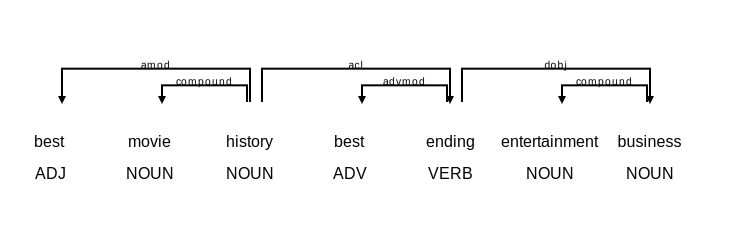

##################################################################################
NER Output
Entities of type 'PERSON':
tim: 2
james whitmore: 2
andy: 2
stephen king: 2
andy dufresne: 1
freeman freeman: 1
rita hayworth: 1
dvd tim robbins: 1
desson thomson: 1
andy robbins: 1
zihuatanejo: 1
andy first: 1
carefree andy: 1
bob gunton: 1
freeman: 1
freeman tim robbins: 1

Entities of type 'ORG':
brooks halten: 1

Entities of type 'GPE':
washington: 1

Entities of type 'PRODUCT':

Entities of type 'DATE':
years: 3
oscar year: 1
today: 1
day day: 1
satan: 1
recent years: 1



In [66]:
import pandas as pd
import nltk
from collections import Counter
!pip install benepar
import benepar
import spacy
benepar.download('benepar_en3')



# Downloading NLTK resources (necessary for POS tagging)
nltk.download('punkt')  # Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagger

# Loading the CSV file into a DataFrame
df_6 = pd.read_csv('lemmatized_reviews.csv')

# Function to tokenize and tag each word in the text
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Tagging each word with its part of speech (POS)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Applying POS tagging to the column and create a new column 'pos_tags'
df_6['0'] = df_6['0'].apply(pos_tagging)

# Initializing counters for each POS tag
noun_count = 0
verb_count = 0
adj_count = 0
adv_count = 0

# Function to count POS tags
def count_pos_tags(pos_tags):
    global noun_count, verb_count, adj_count, adv_count
    # Iterating through each word-tag tuple
    for _, tag in pos_tags:
        if tag.startswith('N'):  # Noun
            noun_count += 1
        elif tag.startswith('V'):  # Verb
            verb_count += 1
        elif tag.startswith('J'):  # Adjective
            adj_count += 1
        elif tag.startswith('R'):  # Adverb
            adv_count += 1

# Applying the count_pos_tags function to each element in the 'pos_tags' column
df_6['0'].apply(count_pos_tags)

print("##################################################################################")
print("POS Tagging Output")
# Printing the total counts of each POS tag
print("Total Nouns:", noun_count)
print("Total Verbs :", verb_count)
print("Total Adjectives :", adj_count)
print("Total Adverbs:", adv_count)


print("##################################################################################")


import spacy
import csv
from benepar import Parser
from spacy import displacy
from IPython.display import SVG
import warnings

# Suppress all warnings which are not impactful to maintain the output window clean
warnings.filterwarnings("ignore")

#function display the output in a graphical format
def display_svg(svg_code):
    display(SVG(svg_code))

def get_parse_trees(text):
    # Loading spaCy model for tokenization and sentence segmentation
    nlp = spacy.load("en_core_web_sm")

    # Loading Benepar model for constituency parsing
    benepar_model = Parser("benepar_en3")

    doc = nlp(text)

    constituency_tree = None
    dependency_tree = None

    # Constituency Parsing with Benepar
    try:
        constituency_tree = benepar_model.parse(text).pretty_print()
    except Exception as e:  # Catch potential errors
        constituency_tree = f"Error parsing constituency: {e}"

    # Dependency Parsing (using spaCy)
    dependency_tree_svg = displacy.render(doc, style="dep", jupyter=False, options={"compact": True, "distance": 100})

    return constituency_tree, dependency_tree_svg

sentences = df_7[0]

# Choosing one sentence for console output
sample_sentence = sentences[6:7]

parse_trees = []
for sentence in sample_sentence:
    constituency_tree, dependency_tree_svg = get_parse_trees(sentence)
    parse_trees.append((sentence, constituency_tree, dependency_tree_svg))


for sentence, constituency_tree, dependency_tree_svg in parse_trees:
    display_svg(dependency_tree_svg)


print("##################################################################################")


#NER operation
# Reading the CSV file into new data frame
df_9 = pd.read_csv('Lower_case_IMDB_reviews.csv')

# Rename the first row to 0
df_9.columns.values[0] = '0'

#writing the modified DataFrame back to a CSV file
df_9.to_csv('modified_Lower case_file.csv', index=False)

# Loading spaCy model with NER component
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on text data and calculate entity counts
def extract_entities_and_counts(texts):
    # Initializing counters for each entity type
    entity_counts = {
        "PERSON": Counter(),
        "ORG": Counter(),
        "GPE": Counter(),
        "PRODUCT": Counter(),
        "DATE": Counter()
    }

    # Processing each text
    for text in texts:
        doc = nlp(text)
        # Extracting entities from the document
        for ent in doc.ents:
            # Checking if the entity is a person, organization, location, product, or date
            if ent.label_ in entity_counts:
                entity_counts[ent.label_][ent.text] += 1

    return entity_counts

# Reading the DataFrame from the CSV file
df_9 = pd.read_csv('modified_Lower case_file.csv')

# Access the clean text data from the appropriate column
texts = df_9['0'].tolist()

# Extracting entities and calculate counts for few sentences
entity_counts = extract_entities_and_counts(texts[2:7])

print("NER Output")
# Printing counts for each entity type
for entity_type, counts in entity_counts.items():
    print(f"Entities of type '{entity_type}':")
    for entity, count in counts.most_common():
        print(f"{entity}: {count}")
    print()





# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Write your response below